In [2]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
wine = load_wine()
x_train,x_test,y_train,y_test = train_test_split(wine.data,wine.target, random_state=1204)

In [3]:
print(x_train.shape)
print(x_test.shape)

(133, 13)
(45, 13)


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [6]:
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
print(x_train_scaled.shape)

(133, 13)


In [7]:
x_test_scaled = scaler.transform(x_test)

In [8]:
from sklearn.svm import SVC
svm = SVC(C=100)
svm.fit(x_train,y_train)
print(svm.score(x_test,y_test))

0.5777777777777777


<b>MinMaxScaler Normalisation</b>

In [9]:
from sklearn.svm import SVC
svm = SVC(C=100)
svm.fit(x_train_scaled,y_train)
print(svm.score(x_test_scaled,y_test))

0.9777777777777777


In [15]:
import numpy as np
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(svm,x_train_scaled,y_train,cv=5)
print(np.mean(scores))

0.9466373626373628


Answer 4: <u>Test score is better than the CV score</u>

In [18]:
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()

<b>Standard Scaler Normalisation:</b>

In [31]:
standardscaler.fit(x_train)
x_train_stanscaled = standardscaler.transform(x_train)
x_test_stanscaled = standardscaler.transform(x_test)
svmstan = SVC(C=100)
svmstan.fit(x_train_stanscaled,y_train)
print(svmstan.score(x_test_stanscaled,y_test))

1.0


<b>RobustScaler Normalisation</b>

In [32]:
from sklearn.preprocessing import RobustScaler
robustscaler = RobustScaler()
robustscaler.fit(x_train)
x_train_robustscaled = robustscaler.transform(x_train)
x_test_robustscaled = robustscaler.transform(x_test)
svmrobust = SVC(C=100)
svmrobust.fit(x_train_robustscaled,y_train)
print(svmrobust.score(x_test_robustscaled,y_test))

1.0


<b>Normalizer Normalisation</b>

In [33]:
from sklearn.preprocessing import Normalizer
normscaler = Normalizer()
normscaler.fit(x_train)
x_train_normscaled = normscaler.transform(x_train)
x_test_normscaled = normscaler.transform(x_test)
svmnorm = SVC(C=100)
svmnorm.fit(x_train_normscaled,y_train)
print(svmnorm.score(x_test_normscaled,y_test))

0.6


In [25]:
param_grid = {'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10,100]}

In [26]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(SVC(),param_grid,cv=5)

In [27]:
grid_search.fit(x_train,y_train)
grid_search.score(x_test,y_test)

0.7777777777777778

In [28]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 100, 'gamma': 0.001}
0.7669172932330827


In [38]:
standardscaler.fit(x_train)
x_train_stanscaled = standardscaler.transform(x_train)
x_test_stanscaled = standardscaler.transform(x_test)
svmstan = SVC(C=100,gamma=0.001)
svmstan.fit(x_train_stanscaled,y_train)
print(svmstan.score(x_test_stanscaled,y_test))

1.0


In [37]:
from sklearn.preprocessing import Normalizer
normscaler = Normalizer()
normscaler.fit(x_train)
x_train_normscaled = normscaler.transform(x_train)
x_test_normscaled = normscaler.transform(x_test)
svmnorm = SVC(C=100,gamma=0.001)
svmnorm.fit(x_train_normscaled,y_train)
print(svmnorm.score(x_test_normscaled,y_test))

0.4222222222222222


In [39]:
from sklearn.preprocessing import RobustScaler
robustscaler = RobustScaler()
robustscaler.fit(x_train)
x_train_robustscaled = robustscaler.transform(x_train)
x_test_robustscaled = robustscaler.transform(x_test)
svmrobust = SVC(C=100,gamma=0.001)
svmrobust.fit(x_train_robustscaled,y_train)
print(svmrobust.score(x_test_robustscaled,y_test))

1.0


In [40]:
prediction = grid_search.predict(x_test)

In [41]:
prediction

array([1, 1, 0, 1, 2, 1, 1, 0, 0, 2, 2, 0, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1,
       1, 1, 1, 1, 2, 2, 2, 0, 1, 0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2,
       2])

In [44]:
errorrate = np.mean(prediction!=y_test)
accuracy = (1-errorrate)
print(accuracy)

0.7777777777777778


In [16]:
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline
from sklearn.pipeline  import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC 

In [23]:
pipe1 = make_pipeline(MinMaxScaler(), SVC())

In [24]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
wine = load_wine()
x_train,x_test,y_train,y_test = train_test_split(wine.data,wine.target,random_state=1204)

In [26]:
pipe1.fit(x_train,y_train)
print(pipe1.score(x_test,y_test))

0.9777777777777777


In [27]:
pipe2 = make_pipeline(StandardScaler(), SVC())
pipe2.fit(x_train,y_train)
print(pipe2.score(x_test,y_test))

1.0


In [37]:
pipe3 = make_pipeline(RobustScaler(), SVC())
pipe3.fit(x_train,y_train)
print(pipe3.score(x_test,y_test))

1.0


In [38]:
pipe4 = make_pipeline(Normalizer(), SVC())
pipe4.fit(x_train,y_train)
print(pipe4.score(x_test,y_test))

0.4222222222222222


# MinMaxScaler

In [54]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C':[0.01,0.1,1,10,100],'svc__gamma':[0.001,0.01,0.1,1,10,100]}
grid1 = GridSearchCV(pipe1,param_grid=param_grid,cv=5)
grid1.fit(x_train,y_train)
print("best cv score", grid1.best_score_)
print("best score", grid1.score(x_test,y_test))
print("best parameters", grid1.best_params_)

best cv score 0.9849624060150376
best score 1.0
best parameters {'svc__C': 1, 'svc__gamma': 1}


In [55]:
import numpy as np
predict1 = grid1.predict(x_test)
print("Test Labels are:", predict1)
print("Accuracy of test set: ", np.mean(predict1==y_test)*100)

Test Labels are: [1 2 0 1 2 1 2 0 1 2 2 0 2 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 2 2
 2 0 0 0 2 2 2 2]
Accuracy of test set:  100.0


# StandardScaler

In [56]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C':[0.01,0.1,1,10,100],'svc__gamma':[0.001,0.01,0.1,1,10,100]}
grid2 = GridSearchCV(pipe2,param_grid=param_grid,cv=5)
grid2.fit(x_train,y_train)
print("best cv score", grid2.best_score_)
print("best score", grid2.score(x_test,y_test))
print("best parameters", grid2.best_params_)

best cv score 0.9849624060150376
best score 1.0
best parameters {'svc__C': 1, 'svc__gamma': 0.1}


In [57]:
predict2 = grid2.predict(x_test)
print("Test Labels are:", predict2)
print("Accuracy of test set: ", np.mean(predict2==y_test)*100)

Test Labels are: [1 2 0 1 2 1 2 0 1 2 2 0 2 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 2 2
 2 0 0 0 2 2 2 2]
Accuracy of test set:  100.0


# RobustScaler

In [58]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C':[0.01,0.1,1,10,100],'svc__gamma':[0.001,0.01,0.1,1,10,100]}
grid3 = GridSearchCV(pipe3,param_grid=param_grid,cv=5)
grid3.fit(x_train,y_train)
print("best cv score", grid3.best_score_)
print("best score", grid3.score(x_test,y_test))
print("best parameters", grid3.best_params_)

best cv score 0.9548872180451128
best score 0.9777777777777777
best parameters {'svc__C': 1, 'svc__gamma': 0.01}


In [59]:
predict3 = grid3.predict(x_test)
print("Test Labels are:", predict3)
print("Accuracy of test set: ", np.mean(predict3==y_test)*100)

Test Labels are: [1 2 0 1 2 1 2 0 1 2 2 0 2 2 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 2 2
 2 0 0 0 2 2 2 2]
Accuracy of test set:  97.77777777777777


# Naturalizer

In [60]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C':[0.01,0.1,1,10,100],'svc__gamma':[0.001,0.01,0.1,1,10,100]}
grid4 = GridSearchCV(pipe4,param_grid=param_grid,cv=5)
grid4.fit(x_train,y_train)
print("best cv score", grid4.best_score_)
print("best score", grid4.score(x_test,y_test))
print("best parameters", grid4.best_params_)

best cv score 0.9172932330827067
best score 0.9777777777777777
best parameters {'svc__C': 100, 'svc__gamma': 100}


In [61]:
predict4 = grid4.predict(x_test)
print("Test Labels are:", predict4)
print("Accuracy of test set: ", np.mean(predict4==y_test)*100)

Test Labels are: [1 2 0 1 2 1 2 0 0 2 2 0 2 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 2 2
 2 0 0 0 2 2 2 2]
Accuracy of test set:  97.77777777777777


In [63]:
import math
def dist(x1,x2):
    return np.linalg.norm(x1-x2)
n_train = x_train.shape[0]
n_test = x_test.shape[0]
dist_own = math.inf + np.ones(n_train)
dist_other = math.inf + np.ones(n_train)
for i in range(n_train-1):
    for j in range(i+1,n_train):
        current_dist = dist(x_train[i],x_train[j])
        if y_train[i] == y_train[j]:
            if(current_dist<dist_own[i]):
                dist_own[i] = current_dist
            if(current_dist<dist_own[j]):
                dist_own[j] = current_dist
        else:
            if(current_dist<dist_other[i]):
                dist_other[i] = current_dist
            if(current_dist<dist_other[j]):
                dist_other[j] = current_dist

In [65]:
score = np.zeros(n_train+1)
p = np.zeros((n_test,3))
for j in range(n_test):
    for i in range(3):
        aug_dist_own = np.append(dist_own,math.inf)
        aug_dist_other = np.append(dist_other,math.inf)
        for i in range(n_train):
            current_dist = dist(x_train[i],x_test[j])
            if y_train[i] ==1:
                if (current_dist <aug_dist_own[i]):
                    aug_dist_own[i] = current_dist
                if(current_dist<aug_dist_own[n_train]):
                    aug_dist_own[n_train] = current_dist
            else:
                if(current_dist<aug_dist_other[i]):
                    aug_dist_other[i] = current_dist
                if(current_dist<aug_dist_other[n_train]):
                    aug_dist_other[n_train] = current_dist
        for i in range(n_train+1):
            if aug_dist_own[i] == 0:
                score[i] = math.inf
                if(aug_dist_other[i]==0):
                    score[i]=0
            else:
                score[i] = aug_dist_other[i] / aug_dist_own[i]
        p[j,1] = np.mean(score<=score[n_train])

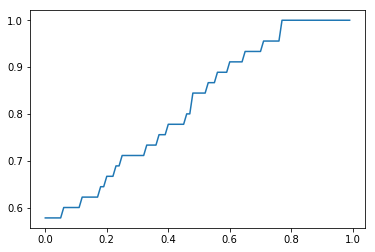

In [68]:
import matplotlib.pyplot as plt
eps = np.zeros(100)
err = np.zeros(100)
for k in range(100):
    eps[k] = k/100
    err[k] = 0
    for j in range(n_test):
        if(p[j,y_test[j]]<=eps[k]):
            err[k] = err[k] +1
    err[k] = err[k] /n_test
plt.plot(eps,err)